# K-mean and PCA

### k-mean 聚类算法

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.io import loadmat

In [2]:
def find_closet_centroids(X,centroids):
    m = X.shape[0]
    k = centroids.shape[0]
    idx = np.zeros(m)
    
    for i  in  range(m):
        min_dist = 10000
        for j  in range(k):
            dist = np.sum((X[i,:] - centroids[j,:]) ** 2)
            if dist < min_dist:
                min_dist = dist
                idx[i] = j
        
    return idx 

In [3]:
data = loadmat('data/ex7data2.mat')
X = data['X']
initial_centroids = initial_centroids = np.array([[3,3],[6,2],[8,5]])

idx = find_closet_centroids(X , initial_centroids)
idx[0:3]

array([0., 2., 1.])

In [4]:
print (idx.shape)

(300,)


In [5]:
data2 = pd.DataFrame(data.get('X'),columns = ['X1','X2'])
data2.head()

,X1,X2
0,1.842080,4.607572
1,5.658583,4.799964
2,6.352579,3.290854
3,2.904017,4.612204
4,3.231979,4.939894


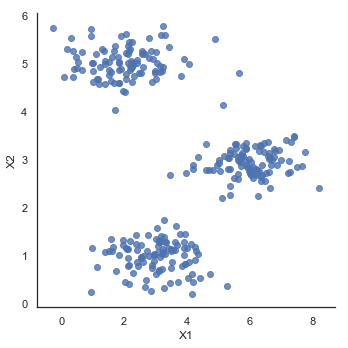

In [6]:
sb.set(context = "notebook",style="white")
sb.lmplot('X1','X2',data = data2, fit_reg = False)
plt.show()

In [7]:
def compute_centroids(X, idx, k):
    m, n = X.shape
    centroids = np.zeros((k, n))
    
    for i in range(k):
        indices = np.where(idx == i)
        centroids[i,:] = (np.sum(X[indices,:], axis=1) / len(indices[0])).ravel()
    
    return centroids

In [8]:
compute_centroids(X,idx,3)

array([[2.42830111, 3.15792418],
       [5.81350331, 2.63365645],
       [7.11938687, 3.6166844 ]])

In [9]:
def run_k_means(X,initial_centroids,max_iters):
    m, n = X.shape
    k = initial_centroids.shape[0]
    idx = np.zeros(m)
    centroids = initial_centroids
    
    for i in  range(max_iters):
        idx = find_closet_centroids(X, centroids)
        centroids = compute_centroids(X, idx, k)
    return idx ,centroids

In [10]:
idx, centroids = run_k_means(X, initial_centroids, 10)

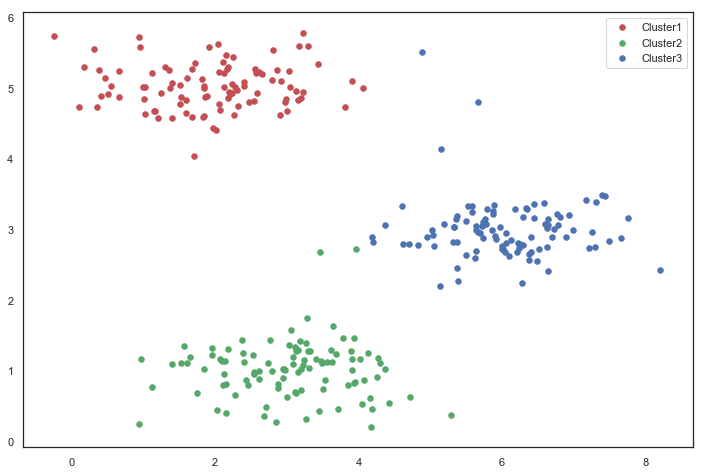

In [11]:
cluster1 = X[np.where(idx == 0)[0],:]
cluster2 = X[np.where(idx == 1)[0],:]
cluster3 = X[np.where(idx == 2)[0],:]

fig , ax = plt.subplots(figsize = (12,8))
ax.scatter(cluster1[:,0], cluster1[:,1], s=30, color = 'r',label = 'Cluster1')
ax.scatter(cluster2[:,0], cluster2[:,1], s=30, color = 'g',label = 'Cluster2')
ax.scatter(cluster3[:,0], cluster3[:,1], s=30, color = 'b',label = 'Cluster3')
ax.legend()
plt.show()

In [12]:
def init_centroids(X ,k):
    m ,n = X.shape
    centroids = np.zeros((k,n))
    idx = np.random.randint(0,m,k)
    
    for i in range(k):
        centroids [i,:] = X[idx[i],:]
    return centroids

In [13]:
def init_centroids(X, k):
    m, n = X.shape
    centroids = np.zeros((k, n))
    idx = np.random.randint(0, m, k)
    print(idx)
    
    for i in range(k):
        centroids[i,:] = X[idx[i],:]
    
    return centroids

In [14]:
init_centroids(X,3)

[251  36 240]


array([[6.69451358, 2.89056083],
       [1.15354031, 4.67866717],
       [6.28438193, 3.17360643]])

### 压缩图像

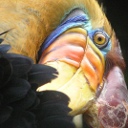

In [15]:
from IPython.display import Image
Image (filename = 'data/bird_small.png')

In [16]:
image_data = loadmat('data/bird_small.mat')
image_data 

{'A': array([[[219, 180, 103],
         [230, 185, 116],
         [226, 186, 110],
         ...,
         [ 14,  15,  13],
         [ 13,  15,  12],
         [ 12,  14,  12]],
 
        [[230, 193, 119],
         [224, 192, 120],
         [226, 192, 124],
         ...,
         [ 16,  16,  13],
         [ 14,  15,  10],
         [ 11,  14,   9]],
 
        [[228, 191, 123],
         [228, 191, 121],
         [220, 185, 118],
         ...,
         [ 14,  16,  13],
         [ 13,  13,  11],
         [ 11,  15,  10]],
 
        ...,
 
        [[ 15,  18,  16],
         [ 18,  21,  18],
         [ 18,  19,  16],
         ...,
         [ 81,  45,  45],
         [ 70,  43,  35],
         [ 72,  51,  43]],
 
        [[ 16,  17,  17],
         [ 17,  18,  19],
         [ 20,  19,  20],
         ...,
         [ 80,  38,  40],
         [ 68,  39,  40],
         [ 59,  43,  42]],
 
        [[ 15,  19,  19],
         [ 20,  20,  18],
         [ 18,  19,  17],
         ...,
         [ 65,  43,  39

In [17]:
A = image_data['A']
A.shape

(128, 128, 3)

### 数据预处理

In [18]:
# normalization value ranges 

A = A / 255

X = np.reshape(A , (A.shape[0] * A.shape[1], A.shape[2]))
X.shape

(16384, 3)

In [19]:
# randomly initialize the centroids 

initial_centroids  = init_centroids(X,16)

# run the algorithm 
idx , centroids = run_k_means(X, initial_centroids ,10)

# get the cloest centriods one last time 
idx = find_closet_centroids(X, centroids)

X_recovered = centroids[idx.astype(int),:]
X_recovered.shape

[15920  6848  4591  1233  3907  5664   739 12487  9362 12630 10747  7885
 13905 11869  1363 11191]


(16384, 3)

In [20]:
# reshape to the original dimensions 
X_recovered = np.reshape(X_recovered, (A.shape[0],A.shape[1],A.shape[2]))
X_recovered.shape

(128, 128, 3)

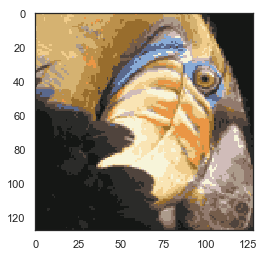

In [21]:
plt.imshow(X_recovered)
plt.show()

可以看到，对图形进行了压缩，但是图像的主要特征仍然存在。这就是 K-means 。我们换个方法实现，用scikit-learn 

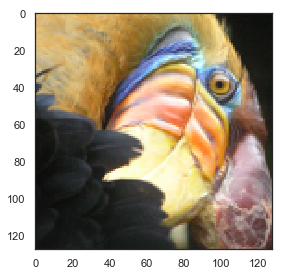

In [22]:
from skimage import io

# cast to float , you need  to do this otherwise the  colour would be weird after custeing 
pic = io.imread('data/bird_small.png')/255
io.imshow(pic)
plt.show()

In [23]:
pic.shape

(128, 128, 3)

In [24]:
data = pic.reshape(128*128 , 3)

In [25]:
data.shape

(16384, 3)

In [26]:
from sklearn.cluster import KMeans 

model = KMeans(n_clusters = 16 ,n_init = 100, n_jobs = -1)

In [27]:
model.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=16, n_init=100, n_jobs=-1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [28]:
centroids = model.cluster_centers_
print(centroids.shape)

C = model.predict(data)
print (C.shape)

(16, 3)
(16384,)


In [29]:
centroids[C].shape

(16384, 3)

In [30]:
compressed_pic = centroids[C].reshape((128,128,3))

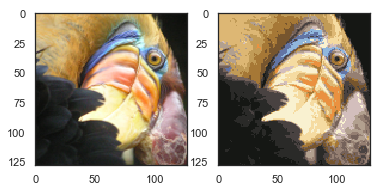

In [31]:
fig , ax = plt.subplots(1,2)
ax[0].imshow(pic)
ax[1].imshow(compressed_pic)
plt.show()

### Principal component analysis (主成分分析)

这个就是PCA 算法了，映像笔记没说仔细，这里看能不能说仔细一点。PCA 也就是降维算法，将算法应用在简单的二维数据集。

首先我们先可视化数据集

In [32]:
data = loadmat('data/ex7data1.mat')
data

{'X': array([[3.38156267, 3.38911268],
        [4.52787538, 5.8541781 ],
        [2.65568187, 4.41199472],
        [2.76523467, 3.71541365],
        [2.84656011, 4.17550645],
        [3.89067196, 6.48838087],
        [3.47580524, 3.63284876],
        [5.91129845, 6.68076853],
        [3.92889397, 5.09844661],
        [4.56183537, 5.62329929],
        [4.57407171, 5.39765069],
        [4.37173356, 5.46116549],
        [4.19169388, 4.95469359],
        [5.24408518, 4.66148767],
        [2.8358402 , 3.76801716],
        [5.63526969, 6.31211438],
        [4.68632968, 5.6652411 ],
        [2.85051337, 4.62645627],
        [5.1101573 , 7.36319662],
        [5.18256377, 4.64650909],
        [5.70732809, 6.68103995],
        [3.57968458, 4.80278074],
        [5.63937773, 6.12043594],
        [4.26346851, 4.68942896],
        [2.53651693, 3.88449078],
        [3.22382902, 4.94255585],
        [4.92948801, 5.95501971],
        [5.79295774, 5.10839305],
        [2.81684824, 4.81895769],
        [

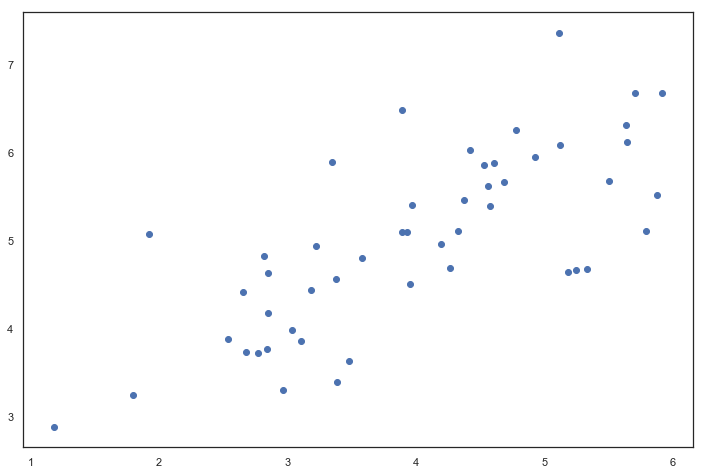

In [33]:
X = data['X']

fig, ax = plt.subplots(figsize = (12,8))
ax.scatter(X[:, 0],X[:,1])
plt.show()

In [34]:
def pca(X):
    # normalizr the features 
    X = (X-X.mean()) / X.std()
    
    # compute the covariance matrix 
    X = np.matrix(X)
    cov = (X.T * X) / X.shape[0]
    
    # perform SVD
    U , S, V = np.linalg.svd(cov)
    
    return U ,S, V

In [35]:
print (X.shape)
U , S ,V = pca(X)

U , S, V

(50, 2)


(matrix([[-0.79241747, -0.60997914],
         [-0.60997914,  0.79241747]]),
 array([1.43584536, 0.56415464]),
 matrix([[-0.79241747, -0.60997914],
         [-0.60997914,  0.79241747]]))

In [36]:
U.shape

(2, 2)

我们得到了主成分 矩阵U ，k 

In [37]:
def project_data(X,U,k):
    U_reduced = U[:,:k]
    print (U_reduced.shape)
    return np.dot(X,U_reduced)

In [38]:
X_nor =  (X-X.mean()) / X.std()
Z = project_data( X_nor,U,1)
Z[:10]

(2, 1)


matrix([[ 1.29667774],
        [-0.71033434],
        [ 1.25612466],
        [ 1.53744654],
        [ 1.25029805],
        [-0.61207992],
        [ 1.11082635],
        [-2.04206316],
        [ 0.06819419],
        [-0.61554135]])

通过反向转化恢复数据

In [39]:
def recover_data(Z ,U,k):
    U_reduced = U[:,:k]
    return np.dot(Z,U_reduced.T)

In [40]:
X_recovered = recover_data(Z ,U ,1)
X_recovered

matrix([[-1.0275101 , -0.79094638],
        [ 0.56288134,  0.43328913],
        [-0.99537513, -0.76620984],
        [-1.2182995 , -0.93781032],
        [-0.99075802, -0.76265573],
        [ 0.48502282,  0.37335599],
        [-0.88023821, -0.6775809 ],
        [ 1.61816653,  1.24561593],
        [-0.05403827, -0.04159703],
        [ 0.48776572,  0.37546738],
        [ 0.40340322,  0.31052767],
        [ 0.3232284 ,  0.24881151],
        [ 0.02545563,  0.01959498],
        [ 0.45739635,  0.35208996],
        [-1.16025138, -0.89312662],
        [ 1.32567037,  1.02046118],
        [ 0.56968227,  0.43852428],
        [-0.80732034, -0.62145092],
        [ 1.47404776,  1.13467764],
        [ 0.41922739,  0.32270864],
        [ 1.51170239,  1.16366304],
        [-0.35541498, -0.27358776],
        [ 1.25072368,  0.96276948],
        [-0.04373204, -0.03366361],
        [-1.2698003 , -0.97745409],
        [-0.48512981, -0.37343834],
        [ 0.81328007,  0.62603854],
        [ 0.92392445,  0.711

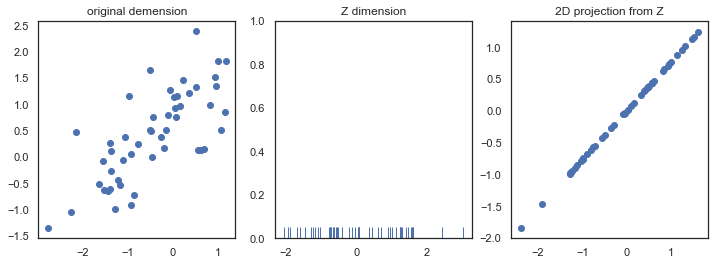

In [41]:
import seaborn as sns
sns.set(context="notebook", style="white")

fig , (ax1,ax2,ax3) = plt.subplots(ncols=3,figsize =(12,4))
ax2.set_title('Z dimension')
#ax1.scatter(Z)
sns.rugplot(Z, ax=ax2)

ax3.set_title('2D projection from Z')
ax3.scatter(list(X_recovered[:,0]),list(X_recovered[:,1]))

ax1.set_title('original demension')
ax1.scatter(X_nor[:, 0],X_nor[:,1])
plt.show()

嗯，大概就是这样，来一个练习

In [42]:
faces = loadmat('data/ex7faces.mat')
X = faces['X']
X.shape

(5000, 1024)

In [51]:
def plot_n_image(X,n):
    # n has to be  a square number
    pic_size = int(np.sqrt(X.shape[1]))
    grid_size = int(np.sqrt(n))
    
    first_n_images = X[:n,:]
    
    fig ,ax_array = plt.subplots(nrows = grid_size, ncols = grid_size,
                                   sharey = True , sharex = True ,
                                 figsize = (8,8))
    for r  in range(grid_size):
        for c in range(grid_size):
            ax_array[r,c].imshow(first_n_images[grid_size *r +c].reshape((pic_size,pic_size)))
            plt.xticks(np.array([]))
            plt.yticks(np.array([]))
            

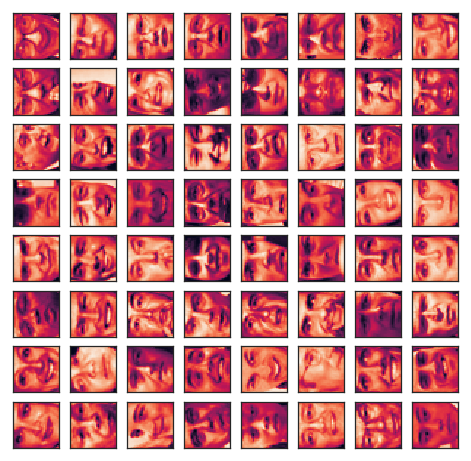

In [52]:
face = np.reshape(X[3,:],(32,32))
plot_n_image(X ,n=64)

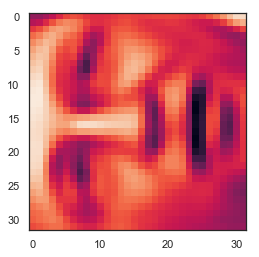

In [57]:
plt.imshow(face)
plt.show()

### pca 算法将维度降低到100 维，可以看到图像模糊了

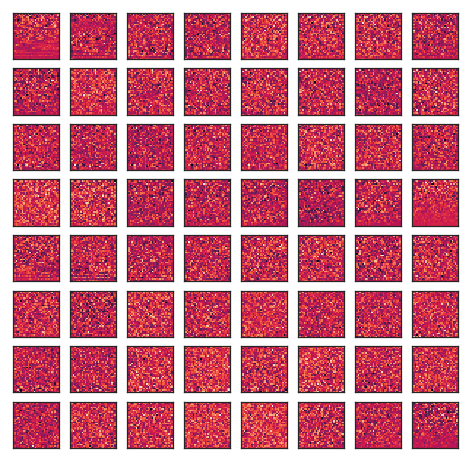

In [60]:
U, S,V = pca(X)
plot_n_image(U ,n=64)

### 将数据恢复 

(1024, 100)


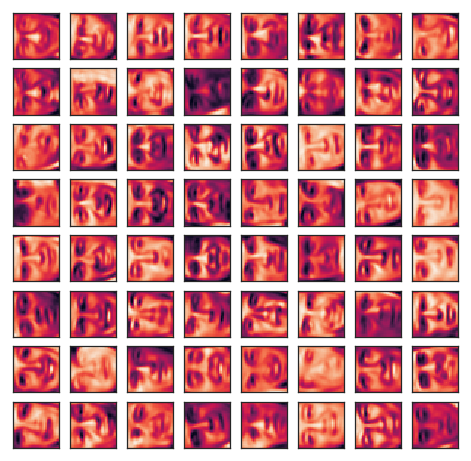

In [61]:
Z = project_data(X,U,100)
X_recovered = recover_data(Z ,U ,100)
plot_n_image(X_recovered ,n=64)


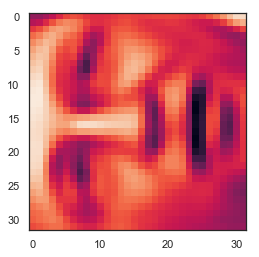

In [62]:
face = np.reshape(X_recovered[3,:],(32,32))
plt.imshow(face)
plt.show()